In [1]:
import pathlib
import pandas as pd
import dask.dataframe as dd
from config import load_config
import visualizations
import numpy as np
import utils
config = load_config()

origin_files = pathlib.Path(config['datapath_10G'])


In [2]:
df0 = dd.read_parquet(origin_files)#.repartition(npartitions=1).reset_index(drop=True)

In [4]:
for k in df0.columns:
    print(k, df0[k].dtypes)

id int64
last_login string
user_name string
fullname string
email string
age int64
income float64
gender string
country string
address string
purchase_history string
is_active bool
registration_date string
phone_number string
login_history string


In [4]:
head=df0.head() # 如果repartition会把所有文件读入内存再head，可以看完head再repartition
head

,id,last_login,user_name,fullname,email,age,income,gender,country,address,purchase_history,is_active,registration_date,phone_number,login_history
0,0,2024-12-02T03:49:12+00:00,RKWKCXRZFV,瞿紫玉,kuegujsk@hotmail.com,82,366311.83,女,美国,Non-Chinese Address Placeholder,"{""avg_price"":9496,""categories"":""零食"",""items"":[{...",False,2024-10-31,+1 (804) 855-6279,"{""avg_session_duration"":105,""devices"":[""deskto..."
1,1,2024-08-25T05:39:16+00:00,RCLELJ,李泽宸,wslfszer@126.com,71,833917.30,男,英国,上海市淄博山水路360号,"{""avg_price"":3014,""categories"":""手套"",""items"":[{...",True,2023-01-13,+44 1850 116429,"{""avg_session_duration"":64,""devices"":[""mobile""..."
2,2,2023-12-21T14:28:09+00:00,KSHSK,詹紫玥,gputsgbf@126.com,54,839379.17,女,澳大利亚,北京市东莞保健中心路614号,"{""avg_price"":8921,""categories"":""裙子"",""items"":[{...",True,2022-07-06,+61 656 440 523,"{""avg_session_duration"":116,""devices"":[""deskto..."
3,3,2023-06-06T03:21:09+00:00,CCJMXPJA,姜小红,akidhwzo@outlook.com,18,383963.16,男,巴西,山东省株洲配送中心路176号,"{""avg_price"":939,""categories"":""耳机"",""items"":[{""...",False,2020-03-20,+55 54 34995-1600,"{""avg_session_duration"":25,""devices"":[""mobile""..."
4,4,2024-10-08T11:02:18+00:00,TJRJDNO,童泽楠,suupywzi@qq.com,77,337059.32,男,英国,浙江省赤峰安康路957号,"{""avg_price"":959,""categories"":""手套"",""items"":[{""...",False,2023-01-05,+44 5383 067377,"{""avg_session_duration"":51,""devices"":[""desktop..."


In [5]:
head["purchase_history"][0]

'{"avg_price":9496,"categories":"零食","items":[{"id":7265}],"payment_method":"现金","payment_status":"已支付","purchase_date":"2023-07-30"}'

In [8]:
head["login_history"][0]

'{"avg_session_duration":105,"devices":["desktop","mobile"],"first_login":"2024-12-04","locations":["home","travel"],"login_count":73,"timestamps":["2024-12-04 21:29:00","2024-12-12 20:51:00","2024-12-20 19:00:00","2024-12-28 10:58:00","2025-01-05 06:58:00","2025-01-13 21:55:00","2025-01-21 18:03:00","2025-01-29 18:26:00","2025-02-06 19:31:00","2025-02-14 11:15:00","2025-02-22 06:41:00","2025-03-02 10:10:00","2025-03-10 20:17:00","2025-03-18 20:19:00"]}'

In [ ]:
# 确保运行后面的代码前使用columnParser.py处理了数据

In [3]:
purchased_items_files = pathlib.Path("processed_data_1") / origin_files.name
login_history_files = pathlib.Path("processed_data_2") / origin_files.name
province_history_files = pathlib.Path("processed_data_3") / origin_files.name

df0 = df0.repartition(npartitions=1).reset_index(drop=True)
df1 = dd.read_parquet(purchased_items_files).repartition(npartitions=1).reset_index(drop=True)
df2 = dd.read_parquet(login_history_files).repartition(npartitions=1).reset_index(drop=True)
df3 = dd.read_parquet(province_history_files).repartition(npartitions=1).reset_index(drop=True)
df = dd.concat([df0,df1,df2,df3],axis=1)

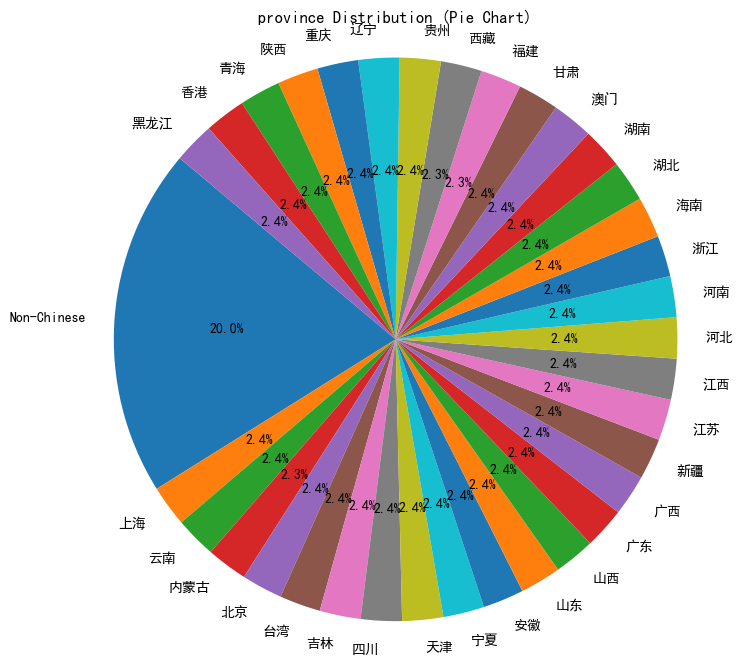

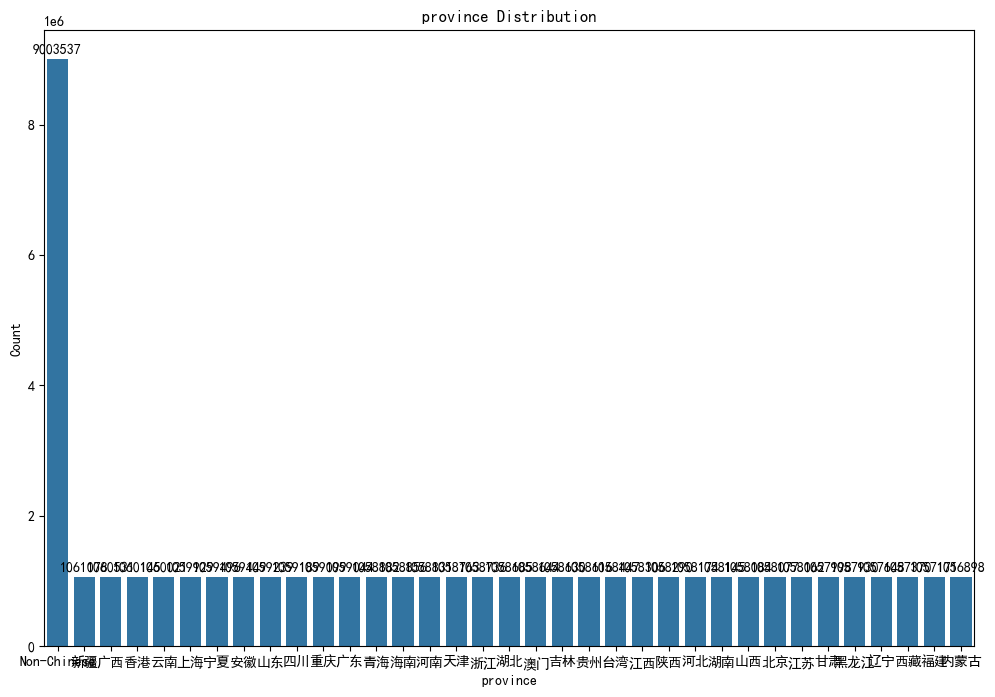

In [6]:
visualizations.draw_pieplot(df,"province")
visualizations.draw_barplot(df,"province")

In [ ]:
# 优质用户：总消费前20%，总消费<收入，处于活跃状态，